In [1]:
from ROOT import *

Welcome to JupyROOT 6.26/00


In [2]:
filenames = []
for i in range(7,48):
    filenames.append("test" + str(i) + ".root")

In [3]:
inp = []
for i in range(7,48):
    a = TFile.Open(filenames[i-7], "READ")
    inp.append(a)

In [4]:
tree = []

for i in range(7,48):
    t = inp[i-7].Get("Position")
    tree.append(t)

In [5]:
hist = []
for i in range(0,41):
    h = TH1F("h" + str(i+7), "", 250, 0, 250)
    hist.append(h)

In [6]:
FZ = []

for i in range(0,41):
    A = []
    for entry in tree[i]:
        #if entry.fZ > 4*(i+7-3)*0.00575 and entry.fZ < 4*(i+7+2)*0.00575:
        A.append(entry.fZ)
        hist[i].Fill(entry.fEvent)
    FZ.append(A)

In [7]:
d = {}
for k in range(41):
    d["B{0}".format(k)] = []
    S = 0
    for i in range(250):
        C = []
        for j in range(S, S + int(hist[k].GetBinContent(i+1))):
            S = S + 1
            C.append(FZ[k][j])
        d["B"+str(k)].append(C)

In [8]:
print(len((d["B0"][0])))

150


In [9]:
d_new = {}
for i in range(41):
    d_new["B_new{0}".format(i)] = []
for k in range(41):
    for j in d["B"+str(k)]:
        d_new["B_new"+str(k)].append(list(set(j)))

In [10]:
D_NEW = {}
for i in range(41):
    D_NEW["B_NEW{0}".format(i)] = []
for l in range(41):
    for j in range(250):
        M = []
        for k in range(len(d_new["B_new"+str(l)][j])):
            if d_new["B_new"+str(l)][j][k] >= (l+7-2)*0.023 and d_new["B_new"+str(l)][j][k] <= (l+7+2)*0.023:
                M.append(d_new["B_new"+str(l)][j][k])
        D_NEW["B_NEW"+str(l)].append(M)

In [12]:
a = [1,23,445,5,5,34]

In [13]:
del a[len(a)-1]

In [14]:
a

[1, 23, 445, 5, 5]

In [15]:
print(d_new["B_new12"][248])
print(D_NEW["B_NEW12"][248])

[0.434125, 0.336375, 1.262125, 0.4226249999999999, 1.2506249999999999, 0.42837499999999995, 0.41687499999999994, 0.4571249999999999, 0.9573750000000001]
[0.434125, 0.4226249999999999, 0.42837499999999995, 0.41687499999999994, 0.4571249999999999]


In [187]:
hist2 = []
fit = []
for i in range(0,41):
    h2 = TH1F("hist2_" + str(i+7), "", 10, (i+7-2)*230, (i+7+2)*230)
    hist2.append(h2)
    f = TF1("fit"+str(i), "gaus", (i+7-2)*230, (i+7+2)*230)
    fit.append(f)

In [188]:
for i in range(0,41):
    S = 0
    for j in range(0, 250):
        Z = 0.
        if len(D_NEW["B_NEW"+str(i)][j]) != 0:
            for k in range(len(D_NEW["B_NEW"+str(i)][j])):
                Z = Z + (4*(floor(D_NEW["B_NEW"+str(i)][j][k]/0.023)+1)-2)*0.00575 *10000
                S = S + 1
            hist2[i].Fill(Z/len(D_NEW["B_NEW"+str(i)][j]))

In [267]:
c = TCanvas()

In [268]:
hist2[6].Draw()

In [269]:
hist2[6].GetStdDev()

59.16188324605682

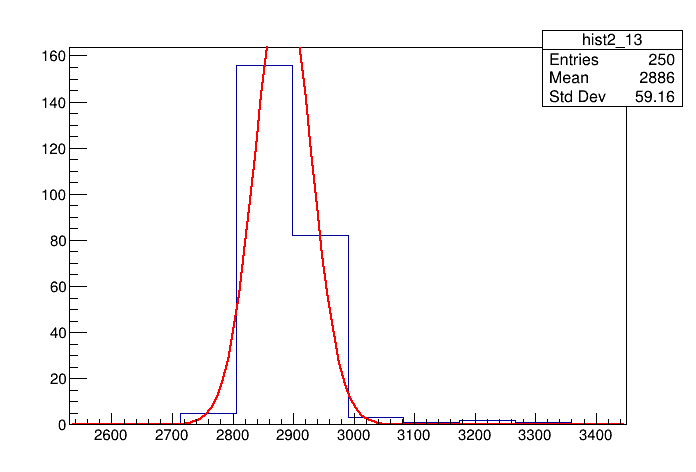

In [270]:
c.Draw()

In [200]:
points = []
errors = []

for i in range(0,41):
    hist2[i].Fit("fit"+str(i))
    points.append(float(fit[i].GetParameter(2)))
    errors.append(float(fit[i].GetParError(2)))

 FCN=4.02464 FROM MIGRAD    STATUS=CONVERGED      68 CALLS          69 TOTAL
                     EDM=8.4931e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.88921e+02   1.51028e+01   1.31855e-02   1.83057e-05
   2  Mean         1.54306e+03   3.08064e+00   3.35518e-03   6.40540e-05
   3  Sigma        4.77211e+01   2.32357e+00   1.33161e-05  -9.44366e-03
 FCN=3.94595 FROM MIGRAD    STATUS=CONVERGED      78 CALLS          79 TOTAL
                     EDM=5.0562e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.20937e+02   1.65893e+01   1.52951e-02   2.54671e-06
   2  Mean         1.71695e+03   3.09089e+00   3.05691e-03  -4.55719e-06
   3  Sigma        3.98496e+01   1.

In [271]:
P = []
for i in range(41):
    P.append(hist2[i].GetStdDev())

In [272]:
print(P)

[43.573224152436424, 41.746443339181184, 49.6708944752599, 51.21181701482125, 27.058414526388248, 29.924985977332422, 59.16188324605682, 47.19327169525516, 29.86220577853218, 49.54048840856774, 32.080530466899816, 35.51507886518824, 45.44303807333443, 44.33887165237511, 33.475443580572026, 31.866762279994443, 34.76401022766721, 48.43447306692629, 43.01100274214884, 34.56367343655422, 54.106708586628656, 56.20898229069518, 36.00475210313895, 32.85726041198035, 36.8545091395947, 43.86927978514273, 47.4016367779805, 29.246811646757568, 37.0388219667054, 41.82600638788597, 35.00519583933673, 48.05897323848008, 32.1699337651528, 36.43852189718347, 35.1585720179165, 37.17273574785004, 49.33401186334533, 39.559004822647466, 38.62254331103738, 28.956105479497914, 61.96600532873846]


In [202]:
errors[8] = 1.5927059499730358
print(points, errors)

[47.72105272841942, 39.84961544964362, 42.248209960327685, 56.25434775161353, 36.97388449704296, 36.30669853226469, 46.41063980640759, 40.164199747626995, 34.807392675596155, 36.794616414409795, 37.181268888650195, 38.54294041411238, 45.85806003527812, 43.33100893634504, 39.25450539385913, 36.36125555831221, 38.97289614797082, 42.607545066286484, 38.46533207801314, 41.329617306166874, 42.59561227020812, 40.67361853096939, 39.718008479215314, 33.7415836763015, 40.14772085070779, 48.71544557791937, 38.032152941534655, 37.89332609572494, 46.831799613226345, 36.05948464295949, 40.2878325072894, 45.99012261625876, 36.962878597573265, 36.17042521216474, 41.28490220509489, 39.80111340533183, 42.00827836470034, 43.706118503585806, 42.66675822571944, 39.820988639825316, 39.01921577409728] [2.3235659290895896, 1.734492842227933, 1.6824283202250925, 4.833017323479314, 1.6577860529267063, 2.083214058635928, 2.6704423758775526, 1.6833826899323157, 1.5927059499730358, 2.9065749259621967, 1.873715830

In [256]:
gr = TGraphErrors()

In [257]:
for i in range(len(points)):
    gr.SetPoint(i, (i+7)*0.023 - 2*0.00575, points[i]*1.61)
    gr.SetPointError(i, 0, errors[i])

In [258]:
c1 = TCanvas()

In [259]:
gr.GetYaxis().SetRangeUser(0, 85)

In [260]:
gr.Fit("pol0")


****************************************
Minimizer is Linear / Migrad
Chi2                      =      331.571
NDf                       =           40
p0                        =      64.7221   +/-   0.293439    


Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResu

In [261]:
gr.Draw("A*")

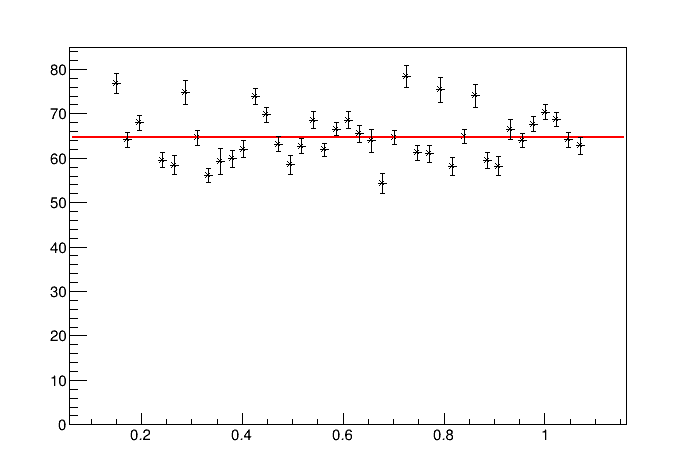

In [262]:
c1.Draw()